IMAGE BLURRING

In [10]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [16]:
#######  Gaussian Noise

def gaussianNoise(img):
    row ,col ,channel = img.shape
    mean = 0 
    var = 0.05
    sigma = var**0.5

    gauss = np.random.normal(mean,sigma,(row,col,channel))
    gauss =gauss.reshape(row,col,channel)

    noisy = gauss+img    

    return noisy


In [23]:
####  SALT PEPPER NOISE

def saltPepperNoisy(img):
    row , col , ch = img.shape

    s_vs_p = 0.5
    amount = 0.04

    noisy = np.copy(img)
    
    #salt 
    num_salt = np.ceil(amount*(img.size)*s_vs_p)
    coords = [np.random.randint(0,i-1,int(num_salt)) for i in img.shape]
    noisy[tuple(coords)] = 1

    #pepper
    num_pepper = np.ceil(amount*(img.size)*(1-s_vs_p))
    coords = [np.random.randint(0,i-1,int(num_pepper)) for i in img.shape]
    noisy[tuple(coords)] = 0

    return noisy

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


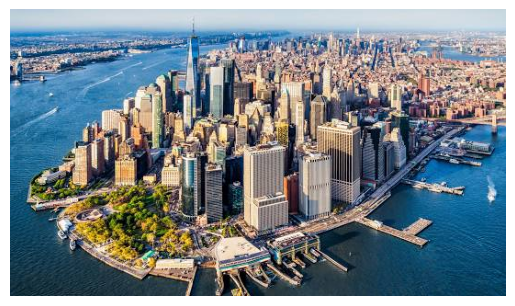

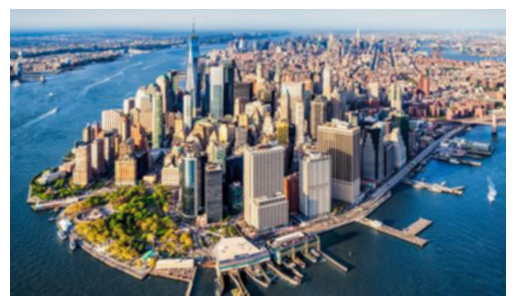

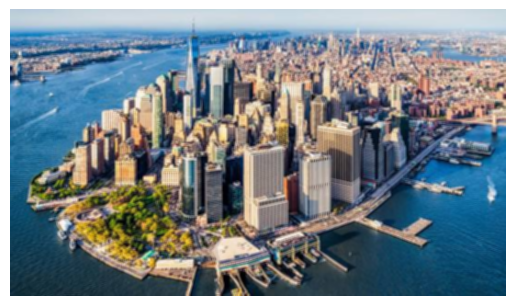

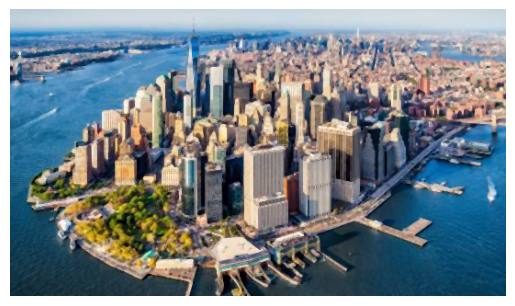

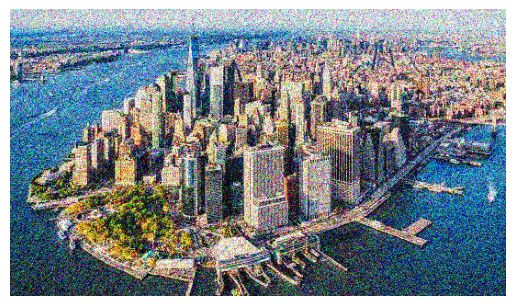

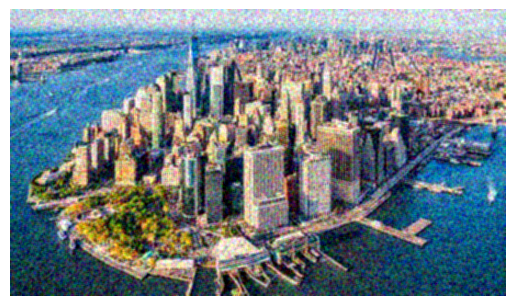

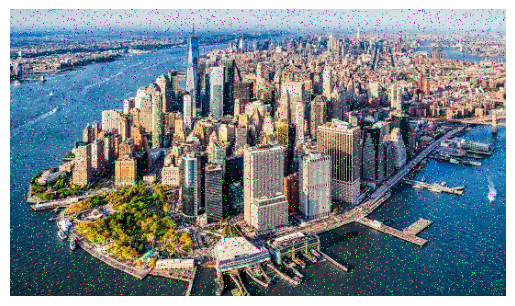

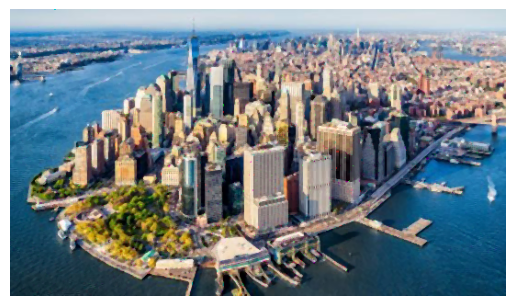

In [26]:
#blurring detayı azaltır , gürültüyü engeller.

img=cv2.imread("NYC.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure()
plt.axis("off")
plt.imshow(img)


# ortalama bulanıklaştırma yöntemi

dst2 = cv2.blur(img,ksize=(3,3))

plt.figure()
plt.axis("off")
plt.imshow(dst2)


# gaussian bulanıklaştırma

gb = cv2.GaussianBlur(img,ksize=(3,3),sigmaX= 7)

plt.figure()
plt.axis("off")
plt.imshow(gb)


# median bulanıklaştırma

mb = cv2.medianBlur(img,ksize= 3)

plt.figure()
plt.axis("off")
plt.imshow(mb)



#içe aktar ve normalize et gauissian ile

img=cv2.imread("NYC.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255

gaussian_noisy_img = gaussianNoise(img)

plt.figure()
plt.axis("off")
plt.imshow(gaussian_noisy_img)


gb1 = cv2.GaussianBlur(gaussian_noisy_img,ksize=(3,3),sigmaX= 7)

plt.figure()
plt.axis("off")
plt.imshow(gb1)




#içe aktar ve normalize et salt_pepper ile

img=cv2.imread("NYC.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255
spImg = saltPepperNoisy(img)

plt.figure()
plt.axis("off")
plt.imshow(spImg)

mb1 = cv2.medianBlur(spImg.astype(np.float32),ksize= 3)

plt.figure()
plt.axis("off")
plt.imshow(mb1)

